<h1 style="text-align: center;">Airbnb Listings Bangkok Project</h1>
<h3 style="text-align: center;">Melin Ayu Safitri</h3>

---

## **1. Business Context**

### **1.1. Context**
Airbnb has become a dominant platform for short-term rentals, connecting hosts with travelers seeking affordable and unique accommodations. In cities like Bangkok, where tourism is booming, the competition among Airbnb listings is fierce. Hosts are continuously striving to optimize their listings to improve occupancy rates and revenue. To remain competitive, hosts need to understand key factors such as pricing trends, seasonal fluctuations, guest preferences, and competitor behaviors. Insights derived from data can help Airbnb hosts in Bangkok make informed decisions to stand out in this crowded market.

### **1.2. Problem Statements**
With the increasing number of Airbnb listings in Bangkok, hosts face significant challenges in maintaining a competitive edge. These challenges include setting competitive prices, understanding seasonal demand variations, adjusting minimum stay policies, and optimizing property descriptions for visibility and guest attraction. Without data-driven insights, hosts might struggle to remain profitable or optimize their listings effectively, leading to lower occupancy and revenue. Therefore, a data-driven approach is necessary to address these challenges and assist hosts in improving their strategies.

### **1.3. Key Objective.**
1. **Geospatial Competition and Listing Density**: Investigate how the concentration of Airbnb listings in specific neighborhoods affects the level of competition among hosts.

2. **Optimize Pricing and Availability:** Develop strategies for hosts to adjust their pricing and availability based on seasonal demand fluctuations and competitive pricing.

3. **Evaluate Minimum Stay Policy Impact:** Assess the impact of minimum night stay policies on booking frequency and revenue to help hosts find the optimal balance for their listings.

## **2. Data Understanding**<br>

### **2.1. General Information**

The dataset consists of Airbnb listings in Bangkok, capturing various aspects of the properties, such as pricing, location, reviews, etc. It contains several columns with details about each listing, such as room type, number of reviews, host information, etc. This data provides a comprehensive overview of the Airbnb market in Bangkok, making it suitable for analysis aimed at understanding market dynamics and improving hosting strategies.

### **2.2. Feature Information**
Below are the columns in the dataset along with their descriptions:

- **id**	                          : Airbnb's unique identifier for the listing.
- **name**                            : Name of the listing.
- **host_id**                         : Airbnb's unique identifier for the host/user.
- **host_name**                       : Name of the host, usually just the first name(s).
- **neighbourhood**                   : The neighborhood is geocoded using the latitude and
longitude against neighborhoods as defined by open or public
digital shapefiles.
- **latitude**                        : Latitude of the listing (WGS84 projection).
- **longitude**                       : Longitude of the listing (WGS84 projection).
- **room_type**                       : All homes are grouped into the following three room types -> Entire home/apt, Private room, Shared room or Hotel.
- **price**                           : Daily price in local currency. Note, the $ sign may be used
despite the locale.
- **minimum_nights**                  : The minimum number of night stays for the listing (calendar
rules may differ).
- **number_of_reviews**               : Total number of reviews the listing has.
- **last_review**                     : Date of the last/newest review.
- **calculated_host_listings_count**  : The number of listings the host has in the current scrape in
the city/region geography.
- **availability_365**                : Avaliability_x. The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host.
- **number_of_reviews_ltm**           : Number of reviews the listing has in the last 12 months.

### **2.3. Statistics Summary**
In order to fully understand the dataset, **statistics summary** is carried out. First, we will determine the number of rows and columns in the dataset.

In [29]:
# Importing required libraries

# Library for data cleaning and data manipulation
import pandas as pd
import numpy as np

# Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

# Library for normality test
import scipy.stats as stats

In [30]:
# Load the dataset using csv format
df = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Airbnb-Listings-Bangkok-Project\data\raw\Airbnb Listings Bangkok.csv")

# Displays the first 5 rows of the dataframe
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [31]:
# Displays the number of rows and columns
print(f'number of rows and columns in the data:',df.shape)

number of rows and columns in the data: (15854, 17)


**Insight** :<br> It was found that the data set consisted of **15,854 rows** and **17 columns**. 

In [32]:
# Provides concise information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

**From the information above we get insight:**<br>
1. Some columns have missing values, including '**name**', '**host_name**', '**last_review**', and '**reviews_per_month**', as their non-null counts are lower than the total of 15,854 entries
2. An inconsistency was found in the data types, particularly with the '**last_review**' column, which is currently categorized as an object. This column needs to be converted to a datetime format


In [33]:
# Displays the number of unique values ​​from a column
df.loc[:,:].nunique()

Unnamed: 0                        15854
id                                15854
name                              14794
host_id                            6659
host_name                          5312
neighbourhood                        50
latitude                           9606
longitude                         10224
room_type                             4
price                              3040
minimum_nights                       86
number_of_reviews                   298
last_review                        1669
reviews_per_month                   513
calculated_host_listings_count       50
availability_365                    366
number_of_reviews_ltm                85
dtype: int64

**Insight** :<br>
1. The dataset contains 15,854 listings with unique id values
2. There are 50 unique neighbourhoods and 4 room types, providing a broad geographic and accommodation type coverage

## **3. Data Cleaning**<br>
Prior to performing any data analysis, it is crucial to fully comprehend and prepare the dataset. This includes reviewing the dataset’s structure, identifying the types of variables, and identifying any missing or inconsistent data. Once initial insights are obtained through descriptive statistics, data cleaning is carried out to resolve any issues, such as missing data or inconsistencies. This process ensures that the dataset is accurate, complete, and suitable for dependable analysis.<br>

### **3.1. Drop Unnecessary Column**<br>
To simplify the dataset and focus on the most important information, unnecessary columns that do not add value to the analysis will be eliminated.<br>
In particular, the column **'Unnamed'** will be removed because as an index from a previously saved file and does not contain any valuable information

In [34]:
# Drop unnecessary columns from the dataset
df.drop(columns=["Unnamed: 0"], inplace=True)

# Verifying if the columns are already dropped or not
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


### **3.2. Missing Values**<br>
the process of identifying whether any data is missing or unavailable in a dataset. Missing data often appears as empty or unfilled cells in certain columns, typically represented by symbols such as NaN (Not a Number) or null.

It is important to check for missing values because they can impact the results of analysis or models being developed. If not handled properly, missing data can lead to errors in calculations, inaccuracies in models, or bias in the analysis.

#### **3.2.1. checking Missing Values**

In [35]:
# checking for missing values
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [36]:
# Calculating the percentage of missing values from every columns
round(df.isna().sum()/len(df)*100, 3)

id                                 0.000
name                               0.050
host_id                            0.000
host_name                          0.006
neighbourhood                      0.000
latitude                           0.000
longitude                          0.000
room_type                          0.000
price                              0.000
minimum_nights                     0.000
number_of_reviews                  0.000
last_review                       36.521
reviews_per_month                 36.521
calculated_host_listings_count     0.000
availability_365                   0.000
number_of_reviews_ltm              0.000
dtype: float64

From the data above, several key observations can be made:<br>
1. The "**name**" column has 8 missing values and the "**host_name**" column has 1 missing value. These are minor issues that can be easily addressed with simple methods.
2. The "**last_review**" and "**reviews_per_month**" columns show substantial missing data, with 5,789 entries missing in each "**36.52%**" of the data. This likely reflects listings that have not received reviews or where the data was not recorded.

#### **3.2.2. Handling Missing Values (name & host_name columns)**

Replace column with the placeholder "**unknown**". There are several reasons why the '**name**' and '**host_name**' columns in the data should be replaced (with a placeholder such as "**unknown**") rather than deleted:
1. **Preservation of Data Structure**: Deleting the columns could disrupt the data structure and reduce the amount of information available in the dataset. By replacing missing values with a placeholder, we retain all columns, ensuring the consistency and completeness of the dataset's structure.
2. **Consistency in Handling Missing Data**: Replacing missing values with a placeholder like "**unknown**" provides a consistent approach for handling missing data, while deleting the column would remove data that may not need processing or could be used later.

In [37]:
# Replacing missing values in 'name' and 'host_name' columns with 'Unknown'
df["name"].fillna("Unknown", inplace=True)
df["host_name"].fillna("Unknown", inplace=True)
df.head(3)

C:\Users\user\AppData\Local\Temp\ipykernel_3384\825208357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["name"].fillna("Unknown", inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3384\825208357.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0


In [38]:
# Confirm the adjustments by checking for any remaining missing values.
df[["name", "host_name"]].isna().sum().reset_index().rename(columns={"index": "column", 0: "missing values"})

,column,missing values
0,name,0
1,host_name,0


#### **3.2.3. Handling Missing Values (last_review & reviews_per_month columns)**

<Axes: >

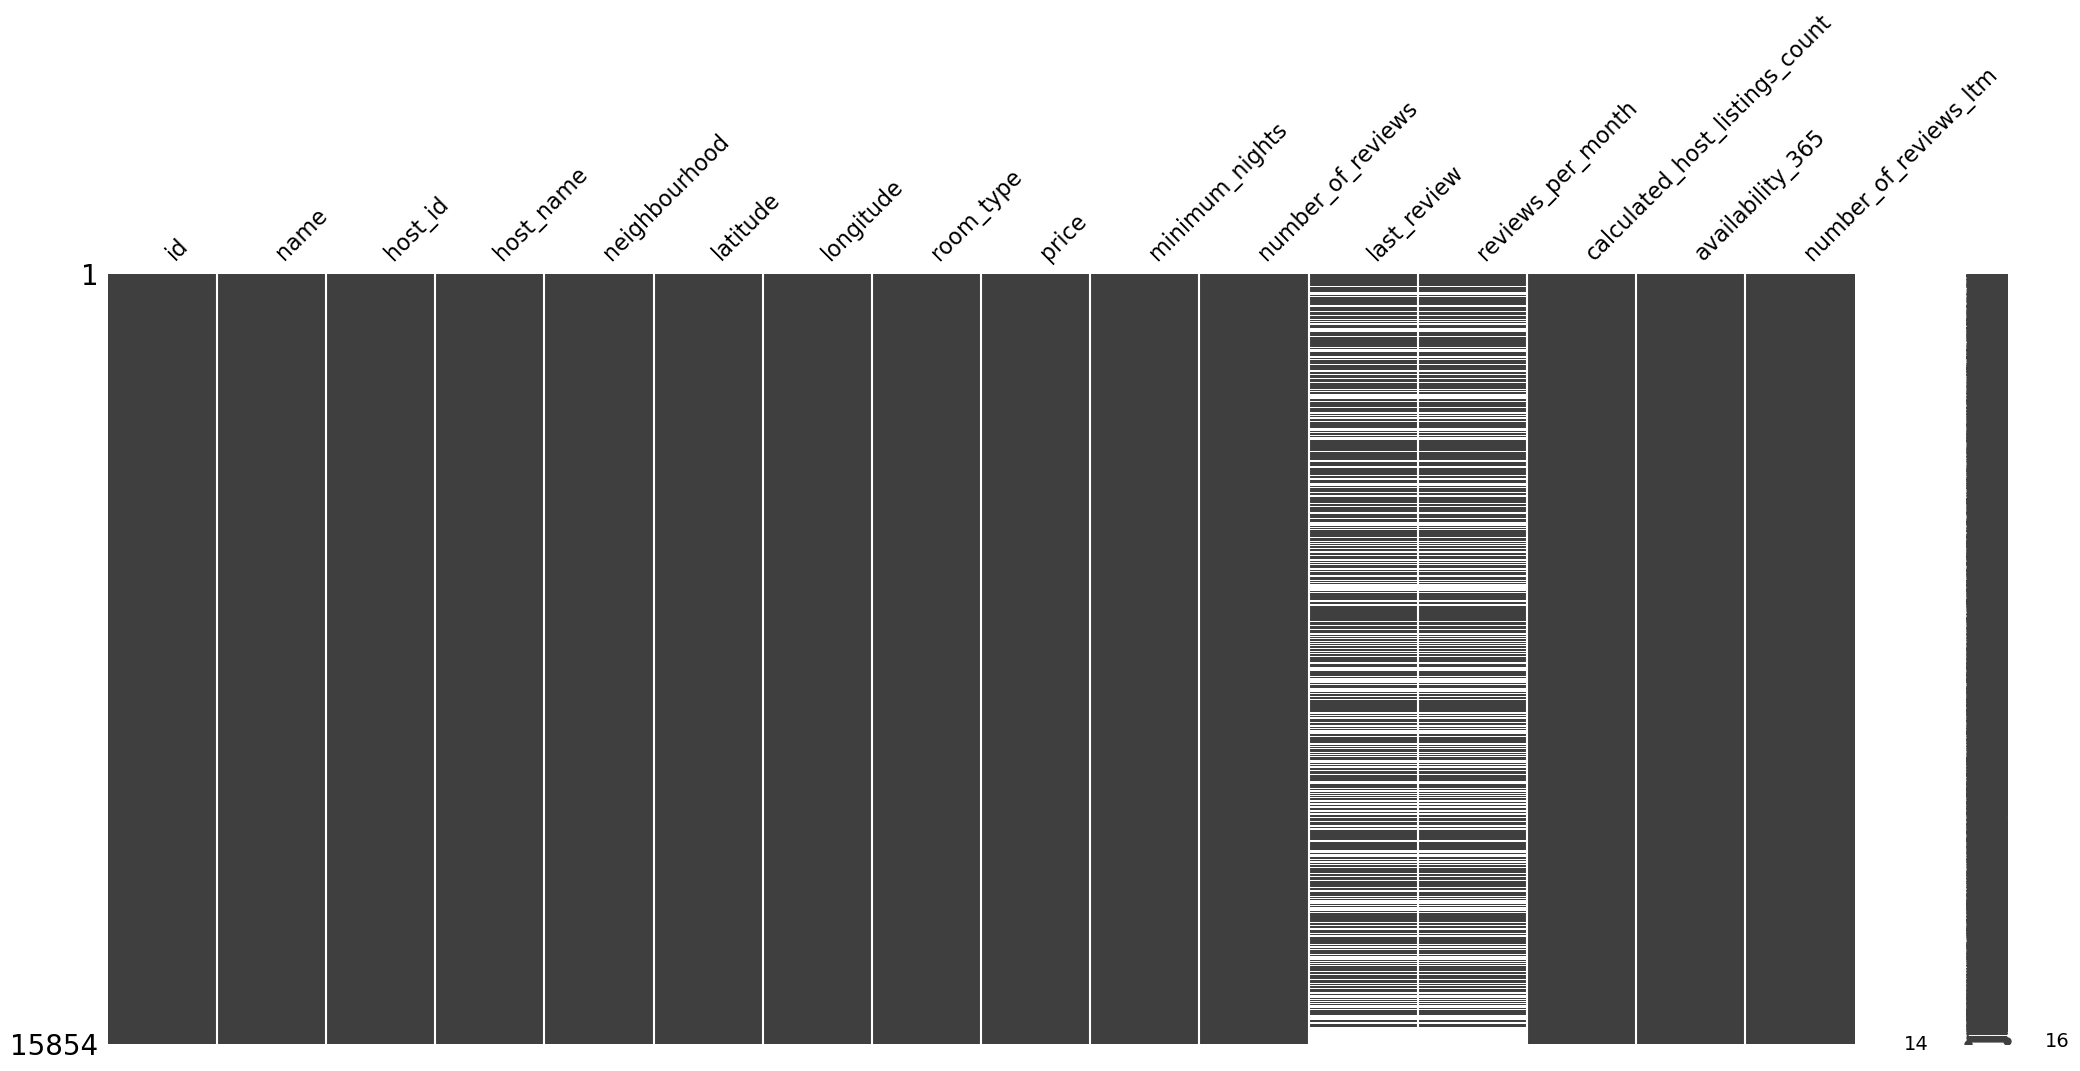

In [39]:
# Visualization of missing values
# Matrix 
import missingno
missingno.matrix(df)

**Insight** : as the heatmap above suggests that they are aligned in the same rows.<br>

**Assumption**:<br>
 the '**number_of_reviews**' column will show the value '**0**' if these values ​​do not exist. This suggests that the lack of reviews for this listing is the reason behind the missing values ​​in '**last_review**' and '**reviews_per_month**'.

In [40]:
# Verifying if the above assumption holds true.
df[df['number_of_reviews']==0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


**The number of rows stays the same at 5,790** confirming that the missing values are indeed caused by the lack of reviews for these listings. To resolve this, the missing values in the '**reviews_per_month**' column can be replaced with "**0**", and a default datetime value will be assigned to the '**last_review**' column, as it is expected to be in a datetime format. This method ensures that the dataset remains consistent and prepared for further analysis.

In [41]:
# Fill the missing values in 'reviews_per_month' with 0
df["reviews_per_month"].fillna(0, inplace=True)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_3384\3633410519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(0, inplace=True)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,0.00,3,365,0


In [54]:
# Convert 'last_review' column from object to datetime
df["last_review"] = pd.to_datetime(df["last_review"])

In [55]:
# Fill the missing values in 'last_review' with 0
df["last_review"].fillna(0, inplace=True)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_3384\1393339745.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["last_review"].fillna(0, inplace=True)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,1970-01-01,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1970-01-01,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,1970-01-01,0.00,3,365,0


In [56]:
# Displays the data type from 'last_review' column
df[['last_review']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 15853 entries, 0 to 15853
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   last_review  15853 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 247.7 KB


In [45]:
# Confirm the adjustments by checking for any remaining missing values.
df[["last_review", "reviews_per_month"]].isnull().sum().reset_index().rename(columns={"index": "Column", 0: "Missing Values"})

,Column,Missing Values
0,last_review,0
1,reviews_per_month,0


***The 'missing values' has been successfully addressed***

### **3.3. Duplicated Values**

 Checking for duplicate data is an essential step to ensure more accurate, efficient, and reliable analysis, as well as to maintain the quality and integrity of the dataset used.

In [46]:
# Verifying for duplicate entries throughout the entire dataset
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [47]:
# Verifying duplicates based on the 'id' column, since each listing should have a distinct identifier
df.duplicated(["id"]).sum()

0

***I have verified that the dataset contains no duplicate entries***

### **3.4. Identify Anomaly Values**

To improve data quality, enhances analysis accuracy, prevents biased results, and uncovers valuable insights. It ensures that decisions made based on the data are well-informed, reliable, and actionable.

#### **3.4.1. Checking Anomalies**

In [48]:
# Descriptive statistics of numerical data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.516178,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,0.952753,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [49]:
# Descriptive statistics of categorical data
df.describe(include=["object"])

,name,host_name,neighbourhood,room_type,last_review
count,15854,15854,15854,15854,15854
unique,14795,5313,50,4,1670
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,0
freq,45,228,2153,8912,5790


**Insight**:<br>
The descriptive statistics show an anomaly in the '**price**' feature, with a minimum value of 0. Clearly, a rental price of 0 is unrealistic.


#### **3.4.2. Handling Anomalies**

In [50]:
# Display the price column with a minimum value of 0
df[df["price"] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,0,0.0,1,0,0


The analysis found that index 11103 has a value of 0 in the 'price' column. The next step is to delete this row.

In [51]:
df.drop(index=11103, inplace=True)

In [52]:
# verifying whether the row has been successfully deleted
display(df.shape, df[df["price"] == 0])

(15853, 16)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


As noted, the total number of rows has reduced by 1 from the original count of 15,854

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15853 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15853 non-null  int64         
 1   name                            15853 non-null  object        
 2   host_id                         15853 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15853 non-null  object        
 5   latitude                        15853 non-null  float64       
 6   longitude                       15853 non-null  float64       
 7   room_type                       15853 non-null  object        
 8   price                           15853 non-null  int64         
 9   minimum_nights                  15853 non-null  int64         
 10  number_of_reviews               15853 non-null  int64         
 11  last_re

In [63]:
df.to_csv('data_cleaned.csv', index=False)

## **4. Analytics**<br>

### **4.1. Geospatial Competition and Listing Density**
Investigate how the concentration of Airbnb listings in specific neighborhoods affects the level of competition among hosts.

### **4.2. Optimize Pricing and Availability**
Develop strategies for hosts to adjust their pricing and availability based on seasonal demand fluctuations and competitive pricing.

### **4.3. Evaluate Minimum Stay Policy Impact**
Assess the impact of minimum night stay policies on booking frequency and revenue to help hosts find the optimal balance for their listings.

## **5. Conclusion and Recommendation**

### **5.1. Conclusion**

### **5.2. Recommendation**